# Numerisk løsning av den todimensjonale bølgelikningen

Bølgelikningen i to dimensjoner er gitt av $\frac{\delta^2 u(x,y,t)}{\delta t^2}$ = $c^2$ $\nabla^2$ $u(x,y,t) + f(x,y,t)$,
eller alternativt $\frac{\delta^2 u(x,y,t)}{\delta t^2}$ = $c^2$ ($\frac{\delta ^2 u(x,y,t)}{\delta x^2}$ + $\frac{\delta ^2 u(x,y,t)}{\delta y^2}$)

Der $c$ er bølgefarten og $f(x)$ er en potensiell tvunget bevegelse, som jeg ser bort fra i denne utregningen.

Bruker sentraldifferansen som tilnærming til den deriverte. Den utledes fra taylorrekka $f(x+h) = f(x) + f'(x) h + \frac{f''(x)h^2}{2} + \frac{f'''(x)h^3}{6}...$

Andre ordens sentraldifferanse er gitt av $\frac{f''(x)h^2}{2} = \frac{f(x+h)-2f(x)+f(x-h)}{h^2} - O(h)$, der $O(h) = \frac{f'''(x)h^3}{6}+ \frac{f'''(x)h^4}{24}...$ Denne er neglisjerbar gitt at steglengden h er liten nok, siden det gir $h^2 >> h^3$, dermed tas den ikke med i utregningen.

Den andrederiverte for en bølgelikningen $u(x,y,t)$ i x-retning kan også noteres slik: $u_{xx} = \frac{u_{i+1} -2u_i + u_{i-1}}{h^2}$, der i indikerer nummeret til elementet i rekka i x-retning.

Trenger også et uttrykk for den deriverte i y- og t-retning:

$u_{yy} = \frac{u_{j+1} -2u_j + u_{j-1}}{h^2}$, der j indikerer nummeret til elementet i rekka i y-retning. Her har jeg også valgt at steglengden i y-retning og x-retning er lik, altså $\Delta x = \Delta y = h$

$u_{tt} = \frac{u_{k+1} -2u_k + u_{k-1}}{k^2}$, der k indikerer nummeret til elementet i rekka i t-retning.

Setter disse tre likningene inn i den opprinnelige bølgelikningen og får:


$\frac{u_{k+1} -2u_k + u_{k-1}}{k^2} = c^2 (\frac{u_{i+1} -2u_i + u_{i-1}+ u_{j+1} -2u_j + u_{j-1}}{h^2})$


$u_{k+1} = \frac{c^2 k^2}{h^2} (u_{i+1} -2u_i + u_{i-1}+ u_{j+1} -2u_j + u_{j-1}) + 2u_k - u_{k-1}$. Denne siste likningen er likningen som gjør at vi kan løse bølgelikningen numerisk.

Dette er en eksplisitt metode, hvilket betyr at det er en risiko for at løsningen blir ustabil ved feil valg av steglengde. Etter å ha lett en stund uten resultat spurte jeg ChatGPT om vanlige stabilitetskrav, og fikk til svar at Courant–Friedrichs–Lewy(CFL)-kravet er et vanlig krav.

Det er gitt av $\frac{c\Delta t}{\Delta x} + \frac{c\Delta t}{\Delta y} \leq 1$ ved eksplisitt løsning.

Dette kravet må man dermed tenke på å oppfylle når man velger steglengde i løsningen.

Nå kan likningen løses ved å implementere dette som python-kode, der resultatet til slutt vises som en animasjon:

In [1]:
#importerer nødvendige biblioteker

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [2]:
#Konstanter, grenser og skrittstørrelse(med mulighet for ulike x- og y-verdier, selv om jeg bruker samme for begge)
c = 1

X_min = -5
X_max = 5
Y_min = -5
Y_max = 5
t_max = 10

X_nmr_of_steps = 50
Y_nmr_of_steps = 50
t_nmr_of_steps = 200

In [3]:
#Arrays for x, y og t, og skrittlengde mellom to steg
x = np.linspace(X_min, X_max, X_nmr_of_steps)
y = np.linspace(Y_min, Y_max, Y_nmr_of_steps)
t = np.linspace(0, t_max, t_nmr_of_steps)
dx = x[1] - x[0]
dy = y[1] - y[0]
dt = t[1] - t[0]

In [4]:
#En if-else som sjekker om løsningen er stabil etter CFL-kravet med de valgte steglengdene
if ((c*dt)/dx + (c*dt)/dy <= 1):
    print("Method is stable with chosen step sizes.")
else:
    print("Method is unstable with chosen step sizes.")

Method is stable with chosen step sizes.


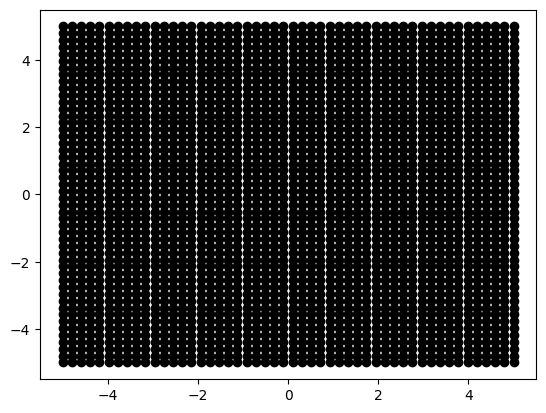

In [5]:
#Omgjør x- og y-vektorene til matriser med np.meshgrid slik at jeg senere kan animere resultatet, resulterer i koordinatsystemet vist i plotet under:

x, y = np.meshgrid(x, y)

plt.plot(x, y, marker='o', color='k', linestyle='none')
plt.show()

In [6]:
#Initialbetingelser(Selvvalgte, synes eksponentfunksjonen gir det kuleste resultatet, har også med en utkommentert sinusfunksjon og en konstant for noen veldig ulike resultater)

def inital(x, y):
    return np.exp(-4 * (x**2 + y**2))
    #return 0.5*np.sin(x) + 0.5*np.cos(y)
    #return 0.5

def initial_dt(x, y):
    return 0


In [7]:
#Oppretter en tom matrise for funksjonen til bølgen u. Ordner deretter initalkrav for både selve bølgen og dens deriverte. Fyller deretter opp matrisen med en for-løkke
#som implementerer formelen for u_k+1 gitt av sentraldifferansen. Løser altså likningen numerisk i hvert punkt.
u = np.zeros((X_nmr_of_steps, Y_nmr_of_steps, t_nmr_of_steps))
u[:, :, 0] = inital(x,y)
u[:, :, 1] = u[:, :, 0] + dt * initial_dt(x, y)
 
for k in range(1, t_nmr_of_steps-1):
    for i in range(1, X_nmr_of_steps-1):
        for j in range(1, Y_nmr_of_steps-1):
            u[i, j, k+1] = (2*u[i, j, k] - u[i, j, k-1] + (c*dt/dx)**2 * (u[i+1, j, k] - 2*u[i, j, k] + u[i-1, j, k]) + (c*dt/dy)**2 * (u[i, j+1, k] - 2*u[i, j, k] + u[i, j-1, k]))

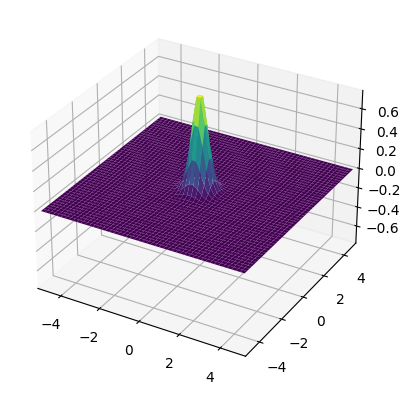

In [9]:
#Animasjon

#Setter opp figuren, aksene(som 3D) med grenser og plotet for første tidssteg
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(x, y, u[:, :, 0], cmap='viridis')

ax.set_xlim([X_min, X_max])
ax.set_ylim([Y_min, Y_max])
ax.set_zlim([-0.75, 0.75])

#Lager funksjon for å animere for flere tidssteg
def update(frame):
    ax.clear()
    surface = ax.plot_surface(x, y, u[:, :, frame], cmap='viridis')
    ax.set_xlim([X_min, X_max])
    ax.set_ylim([Y_min, Y_max])
    ax.set_zlim([-0.75, 0.75])
    ax.set_title(f"Time step {frame}")
    return surface

# Plotter som animasjon og viser til slutt
ani = FuncAnimation(fig, update, frames=np.arange(0, t_nmr_of_steps))

plt.show()
